# US GUN VIOLENCE DATA ANALYSIS

In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd
import scipy.cluster.hierarchy as shc

### Import the dataset

In [2]:
df1=pd.read_csv('/kaggle/input/gun-violence-data/gun-violence-data_01-2013_03-2018.csv')
df1.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


### add few more columns to the dataset from the column date of incident for further analysis

In [3]:
df1["date"]=pd.to_datetime(df1["date"],format="%Y-%m-%d")
df1["Year"]=df1["date"].apply(lambda time:time.year)
df1["Month"]=df1["date"].apply(lambda time:time.month)
df1["Day"]=df1["date"].apply(lambda time:time.day)
df1["Day_of_Week"]=df1["date"].apply(lambda time:time.dayofweek)
dmap1 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df1["Day_of_Week"]=df1["Day_of_Week"].map(dmap1)
df1.head(2)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,Year,Month,Day,Day_of_Week
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1,1,Tue
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,1,1,Tue


In [4]:
df1.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district,Year,Month,Day
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000,239677.000000,239677.000000,239677.000000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711,2015.711629,6.351786,15.773787
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456,1.225870,3.447656,8.831929
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000,2013.000000,1.000000,1.000000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000,2015.000000,3.000000,8.000000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000,2016.000000,6.000000,16.000000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000,2017.000000,9.000000,23.000000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000,2018.000000,12.000000,31.000000


## Number of Incidents in Each State

Let's see how many incidents each state faced and the national average

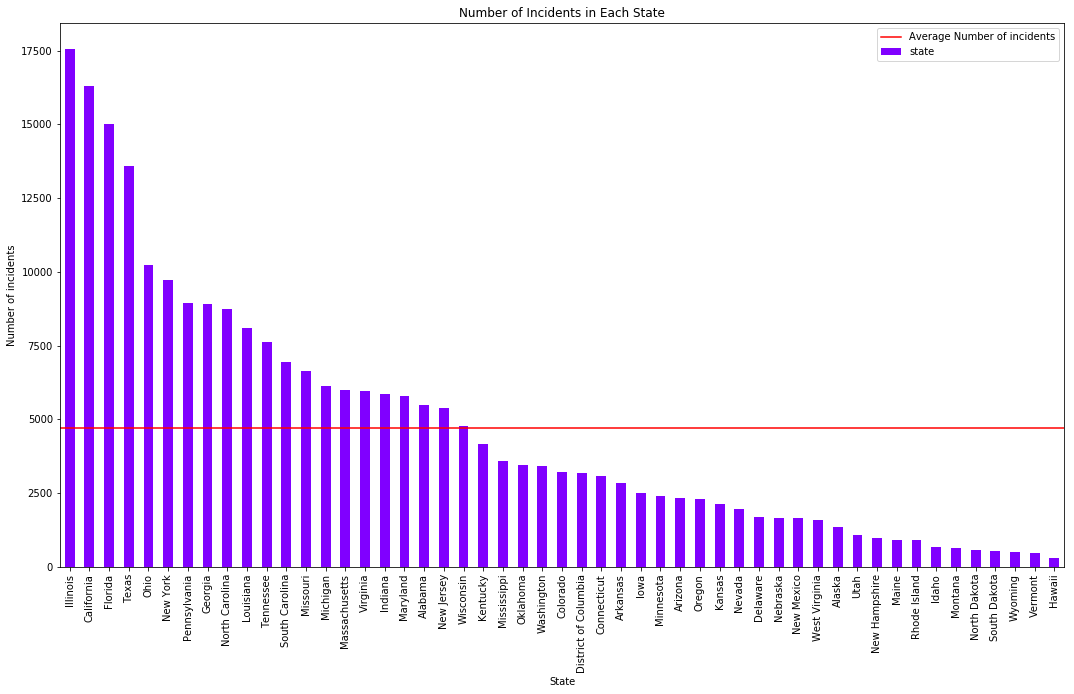

In [5]:
plot = df1.state.value_counts().plot(kind='bar', title="Number of Incidents in Each State", \
                             figsize=(18,10), colormap='rainbow')
plot.set_xlabel('State')
plot.set_ylabel('Number of incidents')
mean_line = plot.axhline(df1.state.value_counts().mean(), color='r',\
                         label='Average Number of incidents')
plt.legend()

We see Illinois, California, Florida and Texas are the worst affected states. We also see the national mean comes around 5000 (which is a pretty high number)

## Loss of lives

Let's see which states have lost most lives due to gun violence.

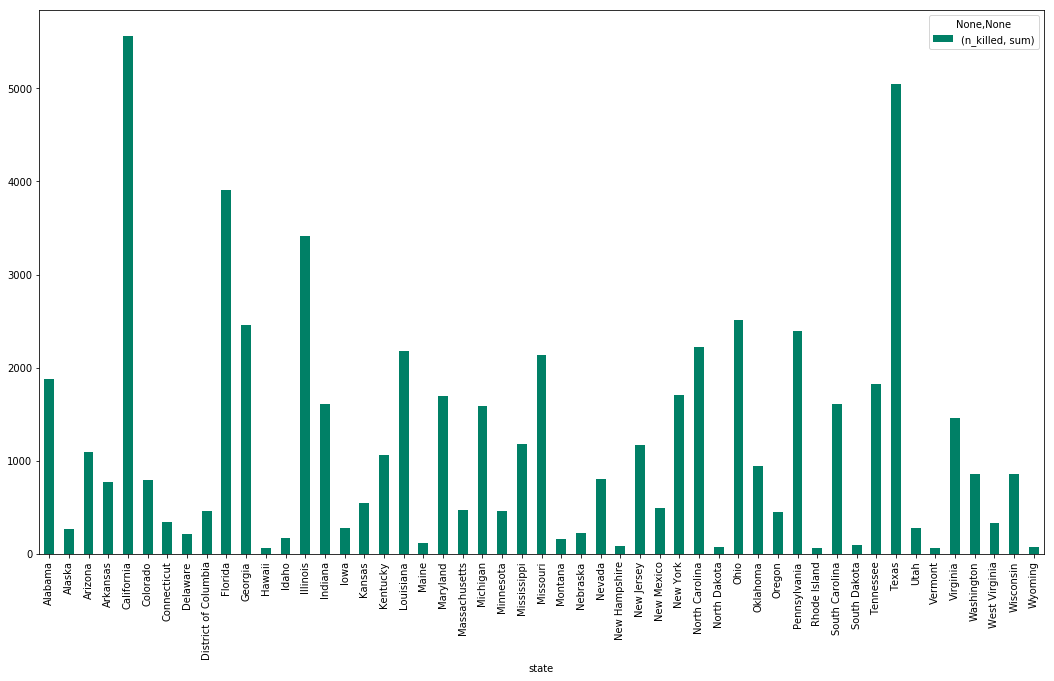

In [6]:
df3=df1.groupby('state').agg({'n_killed':['sum']}).plot.bar(figsize=(18,10), colormap='summer')

California, Texas, Florida has suffered the most followed closely by Illinois. Not surprising since these states had the most number of incidents as we found out from the previous visualization.

## Most dangerous days

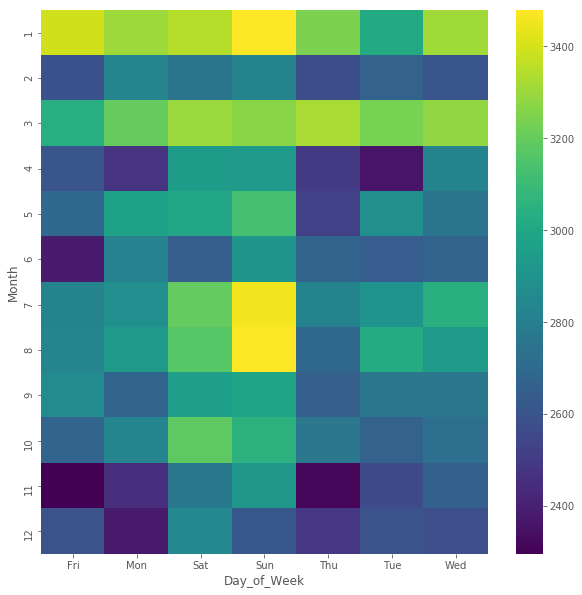

In [7]:
plt.style.use('ggplot')
list8=df1.groupby(["Month","Day_of_Week"]).count()["incident_id"].unstack()
plt.figure(figsize=(10,10))
sns.heatmap(list8,cmap='viridis')

#### As we clearly see from the heatmap, most incidents seem to occur on Sunday. Also January seems to be the most vicious month followd by March also we see a huge rise of incidents in Sundays of July and August

In [8]:
df1.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'Year', 'Month', 'Day', 'Day_of_Week'],
      dtype='object')

# AGGLOMERATIVE CLUSTERING (AGNES)
We choose the number of victims and number of guns used in the shootout as the attributes.

Sp, adding a column of number of victims as n_killed+n_injured 

In [9]:
df1['n_victims']=df1['n_killed']+df1['n_injured']
df1.head(2)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_status,participant_type,sources,state_house_district,state_senate_district,Year,Month,Day,Day_of_Week,n_victims
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1,1,Tue,4
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,1,1,Tue,4


### Interpolation for the "number of guns involved" attribute as it contains NaN values

In [10]:
df_interpol=df1.sort_values(by=['city_or_county'])
print(df_interpol.shape)

(239677, 34)


In [11]:
df_interpol['n_guns_involved'].fillna(0, inplace=True)
for i in range(1, df_interpol.shape[0]-1):
    df_interpol['n_guns_involved'][i]=int(df_interpol['n_guns_involved'][i])
    if(df_interpol['n_guns_involved'][i]==0):
        df_interpol['n_guns_involved'][i]=int(df_interpol['n_guns_involved'][i-1]+ df_interpol['n_guns_involved'][i+1])/2
df_interpol['n_guns_involved'].isna().sum()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0

In [12]:
print(df_interpol['n_guns_involved'].value_counts())
df_interpol['n_victims'].value_counts()

1.0      137527
0.0       60459
0.5       24597
2.0        8212
3.0        2222
          ...  
99.0          1
183.0         1
107.0         1
127.0         1
112.5         1
Name: n_guns_involved, Length: 179, dtype: int64


1      116228
0       97287
2       19794
3        4266
4        1340
5         433
6         136
7          88
8          40
9          20
12         10
10          8
11          3
13          3
15          3
18          3
14          2
17          2
19          2
47          1
16          1
20          1
21          1
25          1
27          1
34          1
35          1
103         1
Name: n_victims, dtype: int64

### Data selection for clustering:

The data from the dataframe is selected such that the number of victims in that particular shootout event>3 and the number of guns involved are greater than 0

In [13]:
guns=[]
victims=[]
for i in range(1, df_interpol.shape[0]-1):
    if(df_interpol['n_guns_involved'][i]>0 and df_interpol['n_victims'][i]>3):
        guns.append(df_interpol['n_guns_involved'][i])
        victims.append(df_interpol['n_victims'][i])
df_cls=pd.DataFrame()
df_cls['guns']=guns
df_cls['victims']=victims
df_cls.head()

,guns,victims
0,1.0,4
1,2.0,4
2,2.0,4
3,2.0,4
4,2.0,4


## Finding outliers using Gaussian Distribution method

In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations

<img src="https://miro.medium.com/max/1572/1*rV7rq7F_uB5gwjzzGJ9VqA.png" alt="Drawing" style="width: 600px">

Therefore, if you have any data point that is more than 3 times the standard deviation, then those points are very likely to be anomalous or outliers.

In [14]:
def find_anomalies(random_data):
    anomalies = []
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std*3.5
    lower_limit = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    for i in range(len(random_data)):
        if random_data[i] > upper_limit or random_data[i] < lower_limit:
            anomalies.append(i)
    return anomalies

def set_labels(df, data_points):    
    for i in range(len(df)):
        df.at[i, 2] = 0
    for i in data_points:
        df.at[i, 2] = 1
    print("Labels set to 1 for:", data_points)


#### Another column is created to indicate if the item is an outlier. 1 is set for the outlier and 0 for the rest

1. Plot the standard deviations of the data to indicate outliers and non outliers

Labels set to 1 for: [  56  168  217  580  615  622  681  784  851 1184 1308 1469 1482 1563
  329  462  542  580  639  682  723  795  797  980 1119]
Size: 25


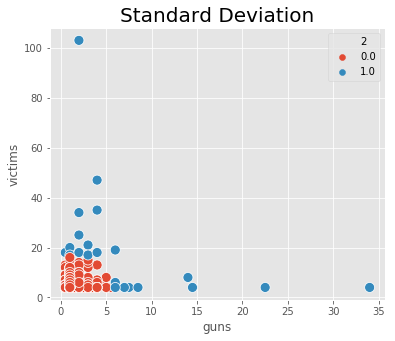

In [15]:
anomalies_x = find_anomalies(df_cls['guns'])
anomalies_y = find_anomalies(df_cls['victims'])
data_points = np.array(anomalies_y + anomalies_x)
set_labels(df_cls,data_points)

plt.figure(figsize=(6,5))
sns.scatterplot(x=df_cls['guns'], y=df_cls['victims'],hue=df_cls[2],s=100)
plt.title("Standard Deviation", size = 20)
print("Size:",len(data_points))

df_cluster = df_cls[df_cls[2] == 0]

In [16]:
df_cls.shape

(1599, 3)

In [17]:
df_cluster.shape

(1575, 3)

Plot the clusterable data points

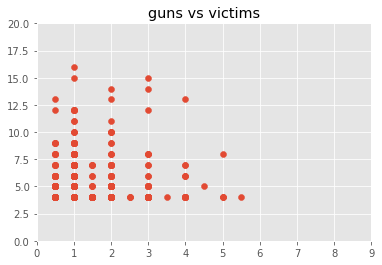

In [19]:
guns_inv = np.array(df_cluster['guns']) 
victims_inv = np.array(df_cluster['victims']) 
X = np.array(list(zip(guns_inv, victims_inv))).reshape(len(guns_inv), 2) 
  
#Visualizing the data 
plt.plot() 
plt.xlim([0, 9]) 
plt.ylim([0, 20]) 
plt.title('guns vs victims') 
plt.scatter(guns_inv, victims_inv) 
plt.show() 

So, out of 1598 points, 25 points were determined to be as outliers with the gaussian method. Hence, we go forward by taking the remaining 1573 points

### Elbow Method to find the optimum K value for clustering
The Elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

In [20]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    kmeanModel=KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_
    
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 1.0957733247458366
2 : 0.7913758459235775
3 : 0.6531534161431269
4 : 0.5663143163719077
5 : 0.38719144997906674
6 : 0.30556656746985167
7 : 0.30218607527692093
8 : 0.2717499841788206
9 : 0.20474820492166373
10 : 0.17546679834833975
11 : 0.1628601835144101
12 : 0.15077596907111118
13 : 0.14287197714598268
14 : 0.12154294287917164
15 : 0.09334128673868282
16 : 0.11642958407025585
17 : 0.07772461615300869
18 : 0.07884441812693967
19 : 0.06886098432527529


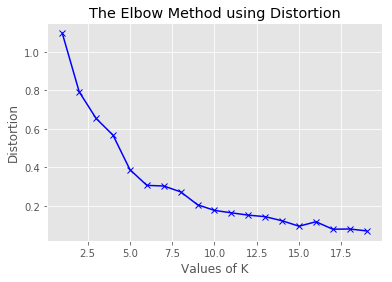

In [21]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

#### So, we can see that the value k=5 is the best point for the elbow method with mapping values

1 : 3859.5469841269833
2 : 1722.9308280755554
3 : 1137.5893863961987
4 : 798.4324864536397
5 : 518.3625521032804
6 : 431.4792151177687
7 : 329.8053012676719
8 : 291.1845985326387
9 : 241.76567819797472
10 : 201.8227034498771
11 : 169.16526100204342
12 : 148.90543194221436
13 : 130.49951953501508
14 : 111.36862011393089
15 : 100.84850549979724
16 : 89.73059794549494
17 : 78.0748993019284
18 : 67.26774777466863
19 : 58.43509741343106


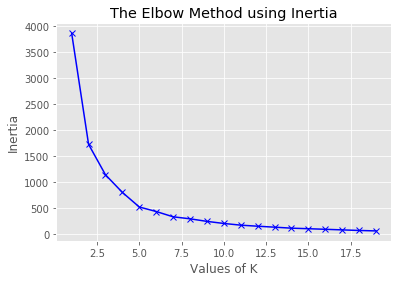

In [22]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

#### trying with inertia values, we can see that the value k=5 holds good here too. Hence, we move forward with k=5 for clustering[](http://)

### CLUSTERING AND PLOTTING

In [23]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels=cluster.fit_predict(df_cluster.iloc[:, 0:2])

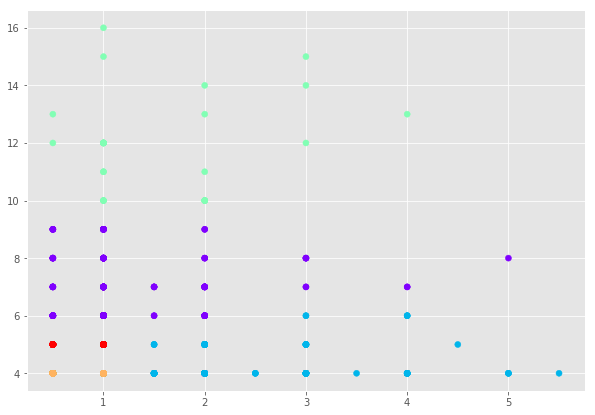

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(df_cluster['guns'], df_cluster['victims'], c=cluster.labels_, cmap='rainbow')

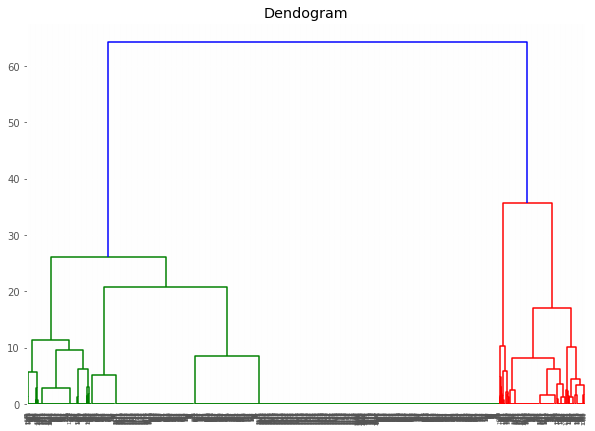

In [25]:

plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(df_cluster.iloc[:, 0:2], method='ward'))

## Inference: 
The algorithm chose the centroids and the clusters are formed.
Dendrogram is shown as above. the cut is made when the top 5 clusters are made and hence is considered as the optimum value by the elbow method can be verified here. 
Here, we can inference the outcome as:

There are the more victims where less guns were used. 
The more the guns, lesser the victims. This may be attributed to the police getting alerted because of the more gunshots fired. But, if only one gun was used, then the police might not have gotten alerted to stop the cataclysm sooner. 